In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import csv

## Heatmap for a Machine functioning Analysis.

In [15]:
#The aim here is to plot the time for particular factors with respect to machince which are affecting production rate.
heatmap_data_filename = 'machine_data.csv'

In [1]:
# Reading and Prosessing data
def read_heat_data(filename):
    factor1 = []
    factor2 = []
    factor3 = []
    factor4 = []
    factor5 = []
    machine = []
    with open(filename,'r') as csvfile:                         # reading data from .csv file format
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[1].startswith('%'):                      # ignoring any rows that begin with the percent sign (%)
                machine.append(rc[0])
                factor1.append(float(rc[1]))                   # converting data from string to float and storing
                factor2.append(float(rc[2]))
                factor3.append(float(rc[3]))
                factor4.append(float(rc[4]))
                factor5.append(float(rc[5]))
    return  machine, factor1, factor2, factor3, factor4, factor5

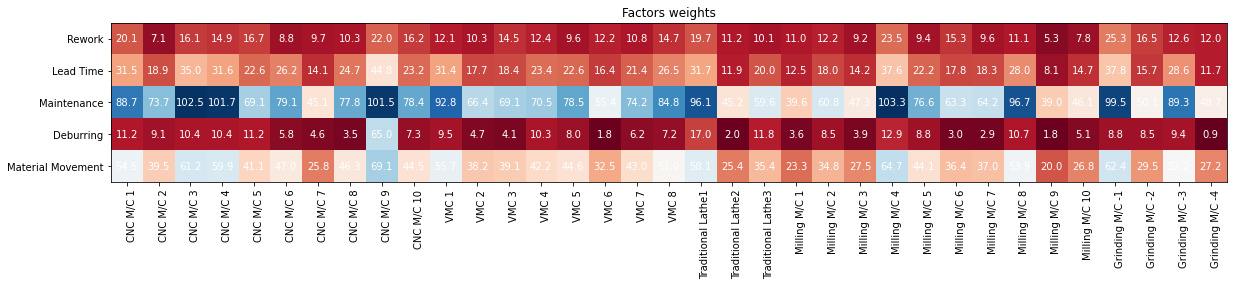

In [17]:
machine, factor1, factor2, factor3, factor4, factor5 = read_heat_data(heatmap_data_filename)  # calling function read_heat_data

# creating a list named 'factors' haveing all values of respective factor to subplot
factors = [factor1[:],factor2[:],factor3[:],factor4[:], factor5[:]]
fig, ax = plt.subplots(figsize = (20,50))

# To label all ticks on X- axis with machine
ax.set_xticks(range(len(machine)))
# label X- axis with machine
ax.set_xticklabels(machine)
# Rotates and locate label on X-axis
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

# label Y- axis with Factors affecting Production
factor_names =['Rework','Lead Time','Maintenance','Deburring','Material Movement']
# To label all ticks on Y- axis with factors
ax.set_yticks(range(len(factor_names)))
ax.set_yticklabels(factor_names)

# Set Title for Heatmap
ax.set_title("Factors weights")

# Plot heatmap
# for color: https://matplotlib.org/stable/tutorials/colors/colormaps.html
im = ax.imshow(factors,cmap = 'RdBu') 

# To create text annotations for 'i'th machine and 'j'th factor
for i in range(len(machine)):  
    for j in range(len(factor_names)):
        text = ax.text(i, j, factors[j][i],ha="center", va="center", color="w")  # To get location, color and position of texts in subplots

##  Pie Chart for a Machine Split Cost Analysis  

In [18]:
filename = 'pie_data.csv'

In [19]:
def pie_data(filename):
    data = []
    cost = []
    with open(filename,'r') as csvfile:           # reading data from .csv file format
        a = csv.reader(csvfile)
        for rc in a:
            if not rc[0].startswith('%'):        # ignoring any rows that begin with the percent sign (%)
                data.append(rc[0]) 
                cost.append(int(rc[1]))         # converting string to integer
    return data,cost

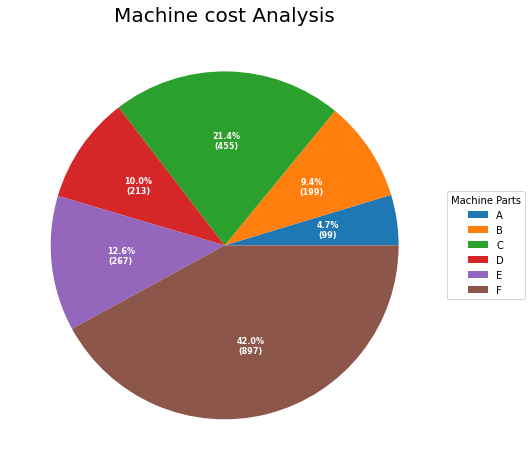

In [20]:
# calling function pie_data
data, cost = pie_data(filename)

# Function to calculate percentage, and getting it to dispaly in foat-(percentage),integer(cost)
def func(c, total):
    absolute = int(c/100.*sum(total))
    return "{:.1f}%\n({:d})".format(c, absolute) # getting it to dispaly in float-(percentage),integer(cost)

# subplot pie diagram, its size
# 3.) Same scaling from data to plot units for x and y
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal")) 

# To text format for legend
wedges, texts, autotexts = ax.pie(cost, autopct=lambda pct: func(pct, cost),textprops=dict(color="w"))
# defining data,label and location for legend
ax.legend(wedges, data,
          title="Machine Parts",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# To text format inside pie
plt.setp(autotexts, size=8, weight="bold") 
ax.set_title("Machine cost Analysis",size = 20) # Set title
plt.show()